In [1]:
import scipy as sp 
from scipy import io
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

/afs/inf.ed.ac.uk/user/s16/s1603859/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
data = io.loadmat("amp_data.mat")


In [3]:
data['amp_data']

array([[ 0.00000000e+00],
       [-3.05175781e-05],
       [ 6.10351562e-05],
       ...,
       [ 9.15527344e-05],
       [-3.05175781e-05],
       [ 0.00000000e+00]])

In [4]:
data= data['amp_data']

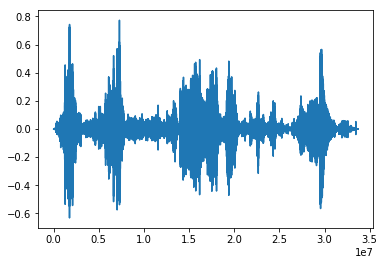

In [5]:
plt.plot(data)

In [6]:
data.shape

(33713280, 1)

[]

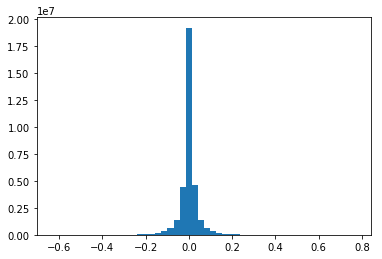

In [7]:
plt.hist(data,bins=50)
plt.plot()

In [8]:
pd_data= pd.DataFrame(data)

In [9]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33713280 entries, 0 to 33713279
Data columns (total 1 columns):
0    float64
dtypes: float64(1)
memory usage: 257.2 MB


In [10]:
pd_data.describe()

,0
count,3.371328e+07
mean,-1.586184e-05
std,4.153176e-02
min,-6.327820e-01
25%,-1.095581e-02
50%,0.000000e+00
75%,1.107788e-02
max,7.725220e-01


In [11]:
def preprocess(data):
    max_index= data.shape[0]//21*21     #reshape the data so that it can be divivded by 21
    clipped_data=data[ : max_index].reshape(-1,21)
    np.random.seed(10) 
    np.random.shuffle(clipped_data)
    train,testandval=train_test_split(clipped_data,test_size=0.3,train_size=0.7,random_state=10,shuffle=False)
    val,test= train_test_split(testandval,test_size=0.5,train_size=0.5,random_state=10,shuffle=False)
    X_shuf_train=train[:,:20]

    y_shuf_train=train[:,-1]

    X_shuf_val=val[:,:20]

    y_shuf_val=val[:,-1]

    X_shuf_test=test[:,:20]

    y_shuf_test=test[:,-1]
    return X_shuf_train,y_shuf_train,X_shuf_val,y_shuf_val,X_shuf_test,y_shuf_test

In [12]:
X_shuf_train,y_shuf_train,X_shuf_val,y_shuf_val,X_shuf_test,y_shuf_test= preprocess(data)

In [13]:
X_shuf_train.shape

(1123775, 20)

In [15]:
y_train= X_shuf_train[0]    #first training sample
x_train=np.arange(0,1,0.05) 
x_train=x_train[:,None]
y_train=y_train[:,None]
y_test=y_shuf_train[0]
#np.linalg.lstsq(x_train,y_train) # solution of weight  


In [18]:
x_trainandtest=np.append(x_train,[1])


array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [19]:
X_bias = np.concatenate([x_train, np.ones((x_train.shape[0],1))], axis=1)
w1,b1=np.linalg.lstsq(X_bias,y_train)[0]
y_pred_1=w1+b1

/afs/inf.ed.ac.uk/user/s16/s1603859/miniconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [24]:
extend_basis= lambda t: [1,t,t**2,t**3,t**4]
extended_x=np.array([[1,x,x**2,x**3,x**4] for x in x_train])
extended_biased_X = np.concatenate([extended_x, np.ones((x_train.shape[0],1))], axis=1)
w=np.linalg.lstsq(extended_biased_X,y_train)[0]
extended_y=np.array(extend_basis(1))[None,:]
extended_biased_y=np.concatenate([extended_y, np.ones((extended_y.shape[0],1))], axis=1)
y_pred_2 = np.dot(extended_biased_y,w)[0,0]

/afs/inf.ed.ac.uk/user/s16/s1603859/miniconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


No handles with labels found to put in legend.


Text(0.5,1,'linear and quadratic fit to selected sample')

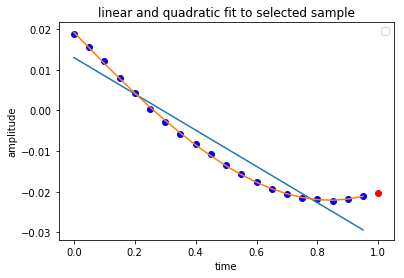

In [25]:
plt.figure()
plt.plot(x_train,y_train,'bo')
plt.plot(x_train,w1*x_train+b1)
plt.plot(1,y_test,'ro')
plt.plot(x_train,np.matmul(extended_biased_X,w))
plt.legend()
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("linear and quadratic fit to selected sample")

In [ ]:
y_train,y_test